In [1]:
# Fake News Classifier Using LSTM

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# Shape of the dataset
df.shape

(20800, 5)

In [7]:
# Drop this null values
df = df.dropna()

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# Get the independent features
X = df.drop('label',axis=1)

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
# Get the dependent feature
Y = df['label']

In [12]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
X.shape

(18285, 4)

In [14]:
Y.shape

(18285,)

In [15]:
# Importing Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [17]:
# Vocabulary size
voc_size = 5000

In [18]:
# One-Hot Representation
messages = X.copy()

In [19]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [20]:
# Displaying all the messages
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [21]:
# Reset the index
messages.reset_index(inplace = True)

In [22]:
messages.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [23]:
# Applying NLTK to remove stopwords.
import nltk
import re
from nltk.corpus import stopwords

In [24]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaushik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Data Preprocessing
from nltk.stem.porter import PorterStemmer # Uses for stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
# Seeing the corpus
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [27]:
# Applying One-Hot Representation
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[2160, 555, 775, 1607, 1866, 451, 2170, 4626, 929, 875],
 [4824, 296, 313, 4335, 3275, 4605, 3216],
 [3543, 3529, 3516, 4231],
 [3817, 2031, 2896, 2795, 2202, 4271],
 [378, 3275, 4659, 3215, 1026, 4042, 3275, 516, 1658, 425],
 [2253,
  983,
  531,
  4474,
  1167,
  907,
  3332,
  1744,
  4642,
  2514,
  312,
  3539,
  2531,
  1988,
  3216],
 [3908, 488, 408, 2094, 2031, 3378, 1357, 3737, 4123, 2964, 1942],
 [1580, 4039, 3388, 1625, 4954, 2399, 907, 1443, 4123, 2964, 1942],
 [2758, 2224, 4208, 2741, 3676, 4238, 2027, 1859, 907, 3179],
 [1639, 4801, 4107, 131, 2776, 2859, 262, 1215],
 [3448, 832, 2915, 4019, 2078, 226, 2811, 3971, 4047, 3542, 3489],
 [2795, 1417, 1866, 4238, 907, 4954],
 [729, 3241, 2732, 1960, 1368, 2271, 4324, 2361, 485],
 [4113, 1743, 4187, 306, 855, 3515, 1760, 4123, 2964, 1942],
 [3548, 698, 2787, 3909, 1514, 4123, 2964, 1942],
 [3212, 1769, 2136, 2064, 2842, 4537, 3848, 1618, 1282, 286],
 [553, 1590, 296],
 [3073, 4347, 2165, 2230, 907, 3878, 604, 3216],
 [4326, 2

In [28]:
# Embedding representation
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_docs

array([[   0,    0,    0, ..., 4626,  929,  875],
       [   0,    0,    0, ..., 3275, 4605, 3216],
       [   0,    0,    0, ..., 3529, 3516, 4231],
       ...,
       [   0,    0,    0, ..., 4123, 2964, 1942],
       [   0,    0,    0, ..., 1498,  426, 2353],
       [   0,    0,    0, ..., 1825, 2480, 1960]])

In [47]:
# Creating model
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(200))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [48]:
# Compiling the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_3 (LSTM)               (None, 200)               192800    
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 393001 (1.50 MB)
Trainable params: 393001 (1.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [50]:
len(embedded_docs), Y.shape

(18285, (18285,))

In [51]:
# Converting to array
import numpy as np
X_final = np.array(embedded_docs)
Y_final = np.array(Y)

In [52]:
# Shape of final array
X_final.shape, Y_final.shape

((18285, 20), (18285,))

In [53]:
# Applying the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.33, random_state=42)

In [54]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 23ms/step - loss: 0.3221 - accuracy: 0.8482 - val_loss: 0.1894 - val_accuracy: 0.9195
Epoch 2/10
192/192 [==============================] - 4s 22ms/step - loss: 0.1467 - accuracy: 0.9419 - val_loss: 0.1983 - val_accuracy: 0.9206
Epoch 3/10
192/192 [==============================] - 4s 22ms/step - loss: 0.1007 - accuracy: 0.9629 - val_loss: 0.2133 - val_accuracy: 0.9142
Epoch 4/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0738 - accuracy: 0.9744 - val_loss: 0.2796 - val_accuracy: 0.9173
Epoch 5/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0502 - accuracy: 0.9832 - val_loss: 0.3409 - val_accuracy: 0.9150
Epoch 6/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.3085 - val_accuracy: 0.9099
Epoch 7/10
192/192 [==============================] - 4s 22ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.3751 - val_accuracy: 0.9092

In [55]:
# Performance metrics and accuracy
y_pred = model.predict(X_test)
y_pred

189/189 [==============================] - 1s 6ms/step


array([[9.9989420e-01],
       [1.5123644e-03],
       [1.2092406e-03],
       ...,
       [1.0437736e-08],
       [9.6444213e-01],
       [2.3736461e-01]], dtype=float32)

In [56]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[3097,  322],
       [ 213, 2403]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9113504556752279

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3419
           1       0.88      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035


In [60]:
# Plotting the accuracy in Seaborn Library
import seaborn as sns
sns.set()

<Axes: >

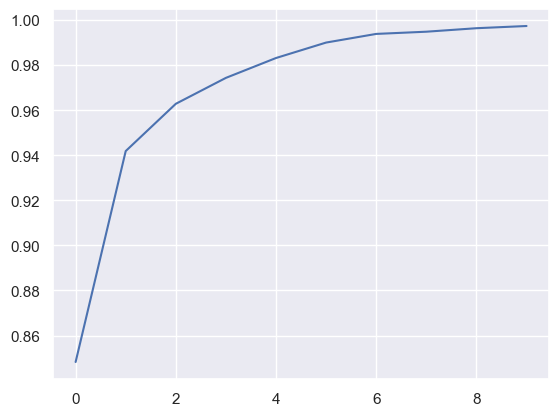

In [61]:
sns.lineplot(x=history.epoch, y=history.history['accuracy'])

<Axes: >

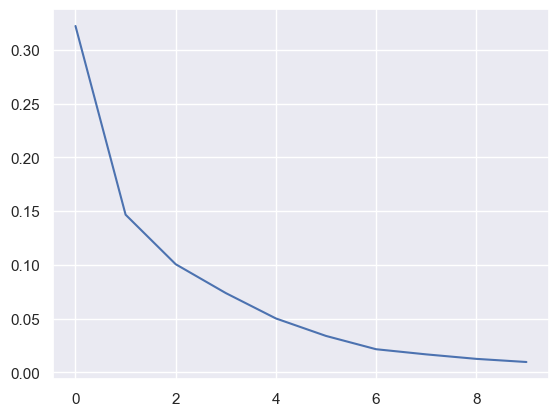

In [62]:
# Plotting the loss in Seaborn Library
sns.lineplot(x=history.epoch, y=history.history['loss'])

<Axes: >

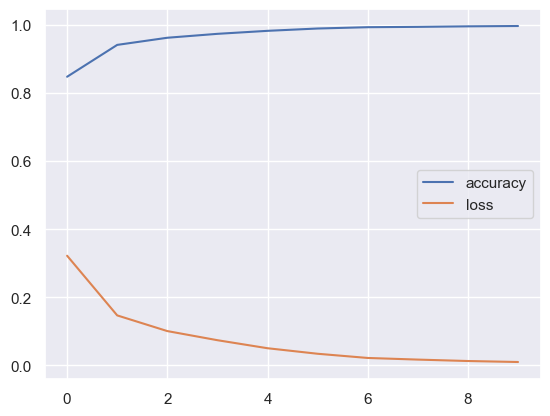

In [65]:
# Plotting the Accuracy and performance in Seaborn
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='accuracy')
sns.lineplot(x=history.epoch, y=history.history['loss'], label='loss')

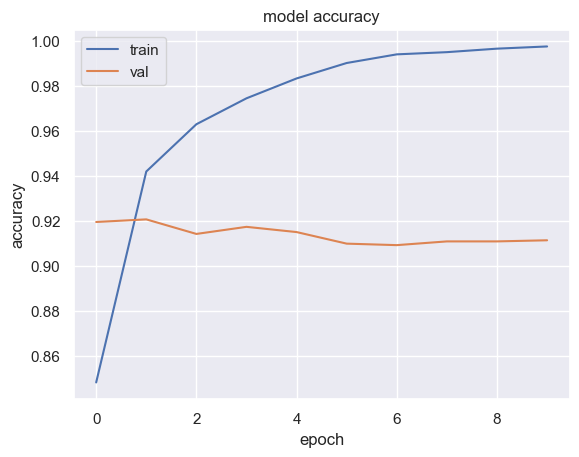

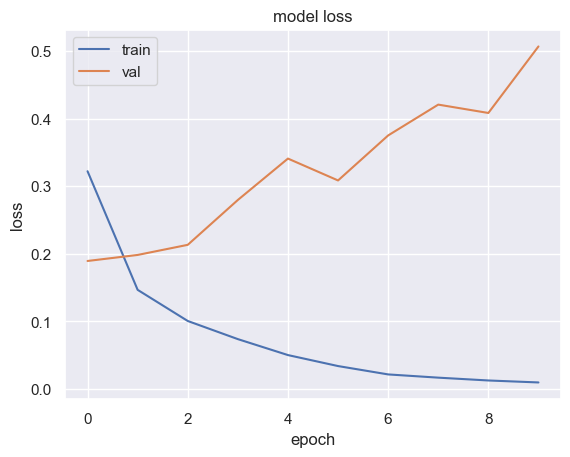

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()